In [1]:
import time
from random import shuffle
import wave
import numpy as np
import math
import binascii

In [2]:
def monoalphabetic_key_generation():
    pool = "0123456789abcdef"
    original_pool = list(pool)
    shuffled_pool = list(pool)
    shuffle(shuffled_pool)
    monoalpha_key = dict(zip(original_pool, shuffled_pool))
    inverse_monoalpha_key = dict(zip(shuffled_pool, original_pool))
    return monoalpha_key,inverse_monoalpha_key
    
def monoalphabetic_audio_encrypt(audio_file,monoalphabetic_key):
    modified_audio_file = audio_file.translate(audio_file.maketrans(monoalphabetic_key))
    return modified_audio_file

def monoalphabetic_audio_decrypt(audio_file,inverse_monoalphabetic_key):
    return monoalphabetic_audio_encrypt(audio_file,inverse_monoalphabetic_key)

def audio_encrypt(file_location,key):
    with open(file_location,"rb") as file:
        audio_file = file.read().hex()
    encrypted_audio = monoalphabetic_audio_encrypt(audio_file,key)
    with open("Sample_encrypted.wav", "wb") as file:
        file.write(bytes().fromhex(encrypted_audio))
    encrypted_audio = bytes().fromhex(encrypted_audio)
    return encrypted_audio

def audio_decrypt(encrypted_audio,key_inverse):
    encrypted_audio = encrypted_audio.hex()
    decrypted_audio = monoalphabetic_audio_decrypt(encrypted_audio,key_inverse)
    with open("Sample_decrypted.wav", "wb") as file:
        file.write(bytes().fromhex(decrypted_audio))
    decrypted_audio = bytes().fromhex(decrypted_audio)
    return decrypted_audio

In [3]:
key,key_inverse = monoalphabetic_key_generation()

In [4]:
# key = {'0': 'd',
#  '1': 'c',
#  '2': '2',
#  '3': 'b',
#  '4': '4',
#  '5': '5',
#  '6': '6',
#  '7': '8',
#  '8': 'a',
#  '9': '9',
#  'a': '0',
#  'b': 'f',
#  'c': '7',
#  'd': '3',
#  'e': '1',
#  'f': 'e'}

# key_inverse = {'d':'0',
#  'c':'1',
#  '2':'2',
#  'b':'3',
#  '4':'4',
#  '5':'5',
#  '6':'6',
#  '8':'7',
#  'a':'8',
#  '9':'9',
#  '0':'a',
#  'f':'b',
#  '7':'c',
#  '3':'d',
#  '1':'e',
#  'e':'f'}

In [5]:
start = time.time()
encrypted_audio = audio_encrypt("Sample2.wav",key)
end = time.time()
print(end-start)

0.007063627243041992


In [6]:
start = time.time()
decrypted_audio = audio_decrypt(encrypted_audio,key_inverse)
end = time.time()
print(end-start)

0.007764101028442383


In [7]:
def shannon_entropy(data):
    """Calculate the Shannon entropy of a byte string."""
    # Calculate the frequency of each byte value
    freq_dict = {}
    for byte in data:
        if byte in freq_dict:
            freq_dict[byte] += 1
        else:
            freq_dict[byte] = 1
    # Convert the frequency counts to probabilities
    probs = [freq_dict[byte] / len(data) for byte in freq_dict]
    # Calculate the entropy
    entropy = -sum([p * math.log2(p) for p in probs])
    return entropy

# Load the two audio files as hex strings
with open('Sample2.wav', 'rb') as f:
    hex1 = f.read().hex().replace('\n', '')
    data1 = binascii.unhexlify(hex1)
with open('Sample_encrypted.wav', 'rb') as f:
    hex2 = f.read().hex().replace('\n', '')
    data2 = binascii.unhexlify(hex2)

# Calculate the entropy of the two files
entropy1 = shannon_entropy(data1)
entropy2 = shannon_entropy(data2)

# Print the results
print("Entropy of audio1: ", entropy1)
print("Entropy of audio2: ", entropy2)


Entropy of audio1:  6.8487057086718375
Entropy of audio2:  6.8487057086718375


<ipython-input-10-2cdf11463c6c>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, plain_audio = wavfile.read('Sample2.wav')
<ipython-input-10-2cdf11463c6c>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, decrypted_audio = wavfile.read('Sample_decrypted.wav')


Plain audio: mean = -0.70, variance = 9448488.48, standard deviation = 3073.84
Decrypted audio: mean = -0.70, variance = 9448488.48, standard deviation = 3073.84


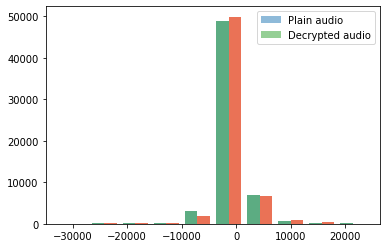

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load plain and decrypted audio files
fs, plain_audio = wavfile.read('Sample2.wav')
fs, decrypted_audio = wavfile.read('Sample_decrypted.wav')

# Compute mean, variance, and standard deviation
plain_mean = np.mean(plain_audio)
plain_var = np.var(plain_audio)
plain_std = np.std(plain_audio)

decrypted_mean = np.mean(decrypted_audio)
decrypted_var = np.var(decrypted_audio)
decrypted_std = np.std(decrypted_audio)

print("Plain audio: mean = {:.2f}, variance = {:.2f}, standard deviation = {:.2f}".format(plain_mean, plain_var, plain_std))
print("Decrypted audio: mean = {:.2f}, variance = {:.2f}, standard deviation = {:.2f}".format(decrypted_mean, decrypted_var, decrypted_std))

# # Compute correlation coefficient
# corr_coef = np.corrcoef(plain_audio, decrypted_audio)[0, 1]
# print("Correlation coefficient = {:.2f}".format(corr_coef))

# Plot histograms
plt.hist(plain_audio, bins=10, alpha=0.5, label='Plain audio')
plt.hist(decrypted_audio, bins=10, alpha=0.5, label='Decrypted audio')
plt.legend(loc='upper right')
plt.show()
